<a href="https://colab.research.google.com/github/navyakarna/NLP_PROJECT_DISASTER-MANAGEMENT/blob/main/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-24-fff99f7695e6> in update_graph(n=22)
     31 def update_graph(n):
     32     # Create a map visualization
---> 33     fig = px.scatter_mapbox(fire_data, lat="location.0", lon="location.1", color="severity",
        fig = undefined
        global px.scatter_mapbox = <function scatter_mapbox at 0x780976277e20>
        global fire_data = [{'location': [34.0522, -118.2437], 'severity': 'High', 'timestamp': '2024-11-25 3:41:00'}]
        global lat = undefined
        global lon = undefined
        global color = undefined
        global hover_name = undefined
        global hover_data = undefined
        global color_continuous_scale = undefined
        global zoom = undefined
        global height = undefined
     34                             hover_name="location", hover_data=["timestamp"],
     35                      

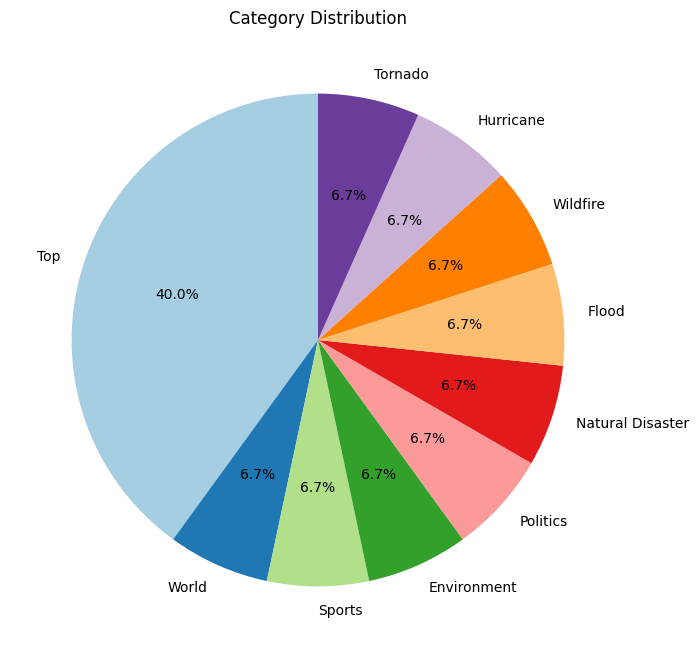

In [25]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("/content/Updated_Newsdata_Records.csv")

# Drop missing rows for TITLE and CATEGORY
df = df.dropna(subset=["TITLE", "CATEGORY"])

# Count occurrences of each category
category_counts = df["CATEGORY"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
category_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=category_counts.index,
    colors=plt.cm.Paired.colors
)
plt.title("Category Distribution")
plt.ylabel("")  # Remove the y-axis label for better appearance
plt.show()



In [2]:
import random
import csv

# Define some example countries and natural disasters
countries = {
    "Indonesia": ["Earthquake", "Tsunami", "Volcanic eruption"],
    "Japan": ["Earthquake", "Tsunami", "Typhoon"],
    "India": ["Cyclone", "Floods", "Drought"],
    "Brazil": ["Floods", "Landslide", "Forest fire"],
    "United States": ["Hurricane", "Tornado", "Earthquake"],
    "Australia": ["Bushfire", "Floods", "Heatwave"],
    "Canada": ["Forest fire", "Blizzard", "Floods"],
    "China": ["Earthquake", "Floods", "Drought"],
    "Mexico": ["Earthquake", "Hurricane", "Floods"],
    "Russia": ["Wildfire", "Floods", "Extreme cold"],
    "Argentina": ["Floods", "Drought", "Heatwave"],
    "Nigeria": ["Floods", "Drought", "Landslide"],
    "Ethiopia": ["Drought", "Floods", "Landslide"],
    "Germany": ["Floods", "Storm", "Wildfire"],
    "France": ["Floods", "Heatwave", "Storm"],
    "Italy": ["Earthquake", "Floods", "Landslide"],
    "United Kingdom": ["Floods", "Storm", "Heatwave"],
    "South Africa": ["Drought", "Floods", "Heatwave"],
    "Egypt": ["Sandstorm", "Floods", "Drought"],
}

# Create a list to store the data
data = []

# Loop through each country and generate random disaster data
for country, disasters in countries.items():
    longitude = random.uniform(-180, 180)  # Random longitude between -180 and 180
    latitude = random.uniform(-90, 90)   # Random latitude between -90 and 90
    disaster = random.choice(disasters)  # Choose a random disaster from the list

    # Determine the disaster type based on the disaster name
    if disaster in ["Earthquake", "Tsunami", "Volcanic eruption"]:
        disaster_type = "Geological"
    elif disaster in ["Cyclone", "Hurricane", "Typhoon", "Storm"]:
        disaster_type = "Meteorological"
    elif disaster in ["Flood", "Drought", "Heatwave", "Extreme cold"]:
        disaster_type = "Climatological"
    else:
        disaster_type = "Other"

    data.append({"country": country, "longitude": longitude, "latitude": latitude, "disaster": disaster, "disaster_type": disaster_type})

# Write the data to a CSV file
with open("natural_disasters.csv", "w", newline="") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=["country", "longitude", "latitude", "disaster", "disaster_type"])
    writer.writeheader()
    writer.writerows(data)

print("Natural disaster data written to natural_disasters.csv")

Natural disaster data written to natural_disasters.csv


In [3]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load dataset
# Replace with the file path or modify the dataframe structure as per your data
file_path = "natural_disasters.csv"  # Replace with your dataset
data = pd.read_csv(file_path)

# Assuming the dataset has columns: 'latitude', 'longitude', 'disaster_type'
# Filter rows with valid latitude and longitude
data = data.dropna(subset=['latitude', 'longitude'])
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')
data = data.dropna(subset=['latitude', 'longitude'])

# Center map based on average coordinates
center_lat = data['latitude'].mean()
center_lon = data['longitude'].mean()

# Create a folium map
world_map = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# Add disaster hotspots to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Disaster Type: {row['disaster_type']}",
        icon=folium.Icon(color="red", icon="info-sign"),
    ).add_to(world_map)

# Optional: Add a heatmap for disaster intensity (based on frequency or severity)
heat_data = data[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data).add_to(world_map)

# Save and display the map
world_map.save("disaster_hotspots_map.html")
print("Map saved as disaster_hotspots_map.html")

Map saved as disaster_hotspots_map.html


In [5]:
!pip install dash
import pandas as pd
import dash
from dash import dcc, html
import folium
from dash.dependencies import Input, Output
from folium.plugins import HeatMap
import base64
import os

# Initialize the Dash app
app = dash.Dash(__name__)

# Load the dataset
file_path = "natural_disasters.csv"  # Replace with your dataset
data = pd.read_csv(file_path)

# Clean data (ensure valid latitudes and longitudes)
data = data.dropna(subset=['latitude', 'longitude'])
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')
data = data.dropna(subset=['latitude', 'longitude'])

# Center map based on average coordinates
center_lat = data['latitude'].mean()
center_lon = data['longitude'].mean()

# Function to generate a folium map and save it as an HTML file
def generate_map():
    # Create a folium map centered around the mean latitude and longitude
    world_map = folium.Map(location=[center_lat, center_lon], zoom_start=2)

    # Add disaster hotspots to the map
    for _, row in data.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Disaster Type: {row['disaster_type']}",
            icon=folium.Icon(color="red", icon="info-sign"),
        ).add_to(world_map)

    # Add a heatmap
    heat_data = data[['latitude', 'longitude']].values.tolist()
    HeatMap(heat_data).add_to(world_map)

    # Save the map to a temporary HTML file
    map_html_path = "disaster_hotspots_map.html"
    world_map.save(map_html_path)

    # Convert the HTML file to base64
    with open(map_html_path, 'r') as file:
        map_html_content = file.read()

    map_base64 = base64.b64encode(map_html_content.encode()).decode()

    # Delete the temporary HTML file
    os.remove(map_html_path)

    return f"data:text/html;base64,{map_base64}"

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Disaster Hotspots Dashboard"),

    # Description
    html.Div("This dashboard visualizes disaster hotspots around the world using geographical data."),

    # Map display using Iframe
    html.Div([
        html.H3("World Map with Disaster Hotspots"),
        html.Iframe(id='disaster_map', srcDoc=generate_map(), width="100%", height="600px")
    ]),

    # Optionally, other statistics like pie chart, etc.
    html.Div([
        html.H3("Disaster Type Distribution"),
        # Example Pie chart can be added here later
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


<IPython.core.display.Javascript object>

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("rg.csv")

print(data.columns)

# Select relevant columns
text_data = data['TITLE']
labels = data['COUNTRY']  # Assuming 'label' is the target column

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Use the encoded labels
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


# Tokenize the data
encodings = tokenizer(text_data.tolist(), truncation=True, padding=True)

# Encode labels
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit the encoder to your labels and transform them
labels_encoded = label_encoder.fit_transform(labels)

# Create datasets
# Use encoded labels when creating the dataset
dataset = CustomDataset(encodings, labels_encoded)

# Create DataLoaders
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Fine-tune the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_)).to(device) #added num_labels

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
def train_epoch(model, data_loader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0  # Initialize total loss
    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()  # Accumulate loss

    return total_loss / len(data_loader)  # Return average loss

# Evaluation loop
def evaluate(model, data_loader, device):
    model.eval()
    total_loss, total_accuracy = 0, 0
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            accuracy = (predictions == labels).float().mean()

            total_loss += loss.item()
            total_accuracy += accuracy.item()

    return total_loss / len(data_loader), total_accuracy / len(data_loader)

# Training loop
for epoch in range(5):  # Adjust the number of epochs as needed
    train_loss = train_epoch(model, train_loader, optimizer, loss_fn, device)
    val_loss, val_accuracy = evaluate(model, test_loader, device)
    print(f"Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Save the fine-tuned model
torch.save(model.state_dict(), "fine_tuned_bert.pt")

Index(['TITLE', 'ARTICLE LINK', 'PUBLISHED DATE (GMT)', 'AUTHOR', 'PUBLISHER',
       'COUNTRY', 'CATEGORY', 'LANGUAGE', 'DESCRIPTION', 'IMAGE URL',
       'VIDEO URL', 'Latitude', 'Longitude'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch: 1, Train Loss: 1.7184, Val Loss: 1.6066, Val Accuracy: 0.0625
Epoch: 2, Train Loss: 1.4643, Val Loss: 1.2846, Val Accuracy: 0.8125
Epoch: 3, Train Loss: 1.1844, Val Loss: 0.8219, Val Accuracy: 0.8125
Epoch: 4, Train Loss: 1.1892, Val Loss: 0.6585, Val Accuracy: 0.8750
Epoch: 5, Train Loss: 1.0442, Val Loss: 0.5487, Val Accuracy: 0.8438


In [6]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

In [7]:
df = pd.read_csv('natural_disasters.csv')

In [8]:
m = folium.Map(location=[20, 0], zoom_start=2)

In [9]:
marker_cluster = MarkerCluster().add_to(m)

for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
        popup=f"Country: {row['country']}<br>Disaster: {row['disaster']}<br>Type: {row['disaster_type']}"
    ).add_to(marker_cluster)

In [10]:
m


In [ ]:
!pip install opencage
import spacy
import pandas as pd
from opencage.geocoder import OpenCageGeocode

# Load SpaCy's pre-trained model
nlp = spacy.load("en_core_web_sm")

# Initialize OpenCage Geocoder with your API key
key = "bf1410ec5fbf4ce6a0d040cd49cca523"  # Replace with your OpenCage API key
geocoder = OpenCageGeocode(key)

# Function to extract locations using NER
def extract_locations(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]  # GPE = Geo-political entity (e.g., cities, countries)
    return locations

# Function to geocode a location
def geocode_location(location):
    try:
        results = geocoder.geocode(location)
        if results:
            lat = results[0]["geometry"]["lat"]
            lng = results[0]["geometry"]["lng"]
            return lat, lng
    except Exception as e:
        print(f"Error geocoding location '{location}': {e}")
    return None, None

# Load cleaned data
df = pd.read_csv("cleaned_news_data.csv")

# Extract locations and geocode them
location_data = []

for index, row in df.iterrows():
    title = row["TITLE"] if "TITLE" in row else ""
    description = row["DESCRIPTION"] if "DESCRIPTION" in row else ""
    text = f"{title} {description}"  # Combine title and description for location extraction

    # Extract locations
    locations = extract_locations(text)

    # Geocode locations
    for loc in locations:
        lat, lng = geocode_location(loc)
        location_data.append({"Original Text": text, "Location": loc, "Latitude": lat, "Longitude": lng})

# Convert location data to a DataFrame
location_df = pd.DataFrame(location_data)

# Save the results
for data in location_data:
    print(f"Original Text: {data['Original Text']}")
    print(f"Location: {data['Location']}")
    print(f"Latitude: {data['Latitude']}, Longitude: {data['Longitude']}")
    print('-' * 50)


Original Text: "china launches cloud platform to share remote-sensing achievements" ...
Location: china
Latitude: 35.0000663, Longitude: 104.999955
--------------------------------------------------
Original Text: "deep fakes" as we take a moment to observe how the world has changed in the past few years, it always helps to think of what our younger selves may have thought or felt when faced with similar events.it’s one way to figure out how jaded or cynical we may have become over the years. and it helps in appreciating and understanding the concerns and worldviews of young people around us.the global trends study that is carried out by ipsos every decade, aims to capture how people across the globe view their lives and futures and reveals shared realities but also divergences. research is conducted across 50 countries and 1,000 individuals in each, equal representation of gender and an age cohort stretching from 19 to 74. it is a robust dataset, but given that it is an online survey,

In [ ]:
!Pip install dash
import spacy
import pandas as pd
from opencage.geocoder import OpenCageGeocode
from twilio.rest import Client
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from dash.dependencies import Input, Output

# SpaCy's pre-trained model for NER
nlp = spacy.load("en_core_web_sm")

# Initialize OpenCage Geocoder with your API key (replace with your OpenCage API key)
key = "bf1410ec5fbf4ce6a0d040cd49cca523"
geocoder = OpenCageGeocode(key)

# Twilio API credentials for SMS
account_sid = 'AC4ed9110460a589b48ca55!pf87a410622f'  # Replace with your Twilio SID
auth_token = 'YOUR_AUTH_TOKEN'  # Replace with your Twilio Auth Token
client = Client(account_sid, auth_token)

# Function to extract locations using NER
def extract_locations(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]  # GPE = Geo-political entity (e.g., cities, countries)
    return locations

# Function to geocode a location
def geocode_location(location):
    try:
        results = geocoder.geocode(location)
        if results:
            lat = results[0]["geometry"]["lat"]
            lng = results[0]["geometry"]["lng"]
            return lat, lng
    except Exception as e:
        print(f"Error geocoding location '{location}': {e}")
    return None, None

# Function to send SMS alert via Twilio
def send_sms_alert(message):
   account_sid = 'AC4ed9110460a589b48ca55f87a410622f'
auth_token = '716c0ae5829d38094636f4b9c425dd23'
client = Client(account_sid, auth_token)
message = client.messages.create(
  messaging_service_sid='MGc2a10f9df1071c9f04082e643574550d',
  body='Disaster Alert: Earthquake or flood expected',
  to='+918826522347'
)
print(message.sid)

# Example function to classify and send an alert based on severity
def send_alert(message, alert_type, severity):
    # Severity threshold (e.g., severity >= 0.7 triggers an alert)
    if severity >= 0.7:
        if alert_type == 'sms':
            send_sms_alert(message)
        elif alert_type == 'email':
            send_email_alert(message)

# Example email function (this could be added to your email system)
def send_email_alert(message):
    # Email sending logic (you can modify with your email credentials)
    print(f"Email alert sent: {message}")

# Load and clean your dataset (replace with actual CSV path)
df = pd.read_csv("/content/Updated_Newsdata_Records.csv")


if 'CATEGORY' in df.columns:
    df = df.rename(columns={'CATEGORY': 'Disaster Type'})
else:
    # If 'CATEGORY' column is not found, create 'Disaster Type' column
    # and assign a default value (e.g., 'Unknown') to all rows
    df['Disaster Type'] = 'Unknown'




# Extract locations and geocode them
location_data = []

for index, row in df.iterrows():
    title = row["TITLE"] if "TITLE" in row else ""
    description = row["DESCRIPTION"] if "DESCRIPTION" in row else ""
    text = f"{title} {description}"  # Combine title and description for location extraction

    # Extract locations
    locations = extract_locations(text)

    # Geocode locations
    for loc in locations:
        lat, lng = geocode_location(loc)
        location_data.append({"Original Text": text, "Location": loc, "Latitude": lat, "Longitude": lng})

# Display the results and send alerts (for testing purposes)
for data in location_data:
    print(f"Original Text: {data['Original Text']}")
    print(f"Location: {data['Location']}")
    print(f"Latitude: {data['Latitude']}, Longitude: {data['Longitude']}")

    # Example severity (for testing): If sentiment or context indicates urgency, send an alert
    send_alert("Flood warning in Mumbai, India. Immediate evacuation advised!", 'sms', severity=0.9)

# Dash App for visualization
app = dash.Dash(__name__)

# Layout for the Dash app
app.layout = html.Div([
    html.H1("Real-time Disaster Monitoring Dashboard"),
    dcc.Dropdown(
        id='disaster_type',
        options=[{'label': x, 'value': x} for x in df['Disaster Type'].unique()],
        value='Flood',  # Default value
        style={'width': '50%'}
    ),
    dcc.Graph(id='map', style={'height': '600px'})
])

# Callback to update map based on selected disaster type
@app.callback(
    Output('map', 'figure'),
    Input('disaster_type', 'value')
)
def update_map(disaster_type):
    filtered_df = df[df['Disaster Type'] == disaster_type]

    fig = px.scatter_mapbox(
        filtered_df,
        lat="Latitude",
        lon="Longitude",
        hover_name="Location",
        color="Severity",
        size="Severity",
        size_max=15,
        color_continuous_scale="Viridis",
        title=f"Disasters: {disaster_type}",
        mapbox_style="carto-positron"
    )
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)



SMaea8c859541c5180046444601a739337
Original Text: "China launches cloud platform to share remote-sensing achievements" ...
Location: China
Latitude: 35.0000663, Longitude: 104.999955
Original Text: "Deep fakes" AS we take a moment to observe how the world has changed in the past few years, it always helps to think of what our younger selves may have thought or felt when faced with similar events.It’s one way to figure out how jaded or cynical we may have become over the years. And it helps in appreciating and understanding the concerns and worldviews of young people around us.The Global Trends study that is carried out by Ipsos every decade, aims to capture how people across the globe view their lives and futures and reveals shared realities but also divergences. Research is conducted across 50 countries and 1,000 individuals in each, equal representation of gender and an age cohort stretching from 19 to 74. It is a robust dataset, but given that it is an online survey, it acknowledges

<IPython.core.display.Javascript object>

In [12]:
data = pd.read_csv("/content/rg.csv")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


2024-11-24 22:00:54.894 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 22:00:54.896 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 22:00:54.899 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 22:00:54.901 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 22:00:54.907 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-11-24 22:00:54.908 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

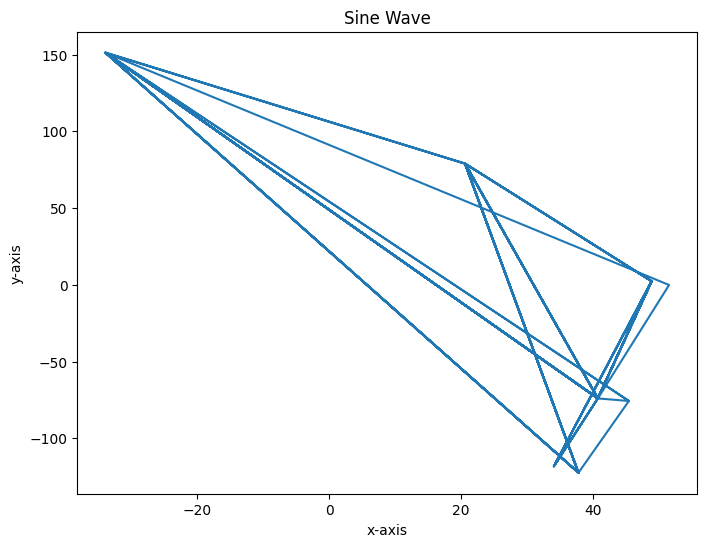

2024-11-24 22:00:55.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 22:00:55.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 22:00:55.864 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

<Figure size 640x480 with 0 Axes>

In [13]:
!pip install streamlit
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for user input (if applicable)
new_text = st.text_input("Enter text to classify:")
if new_text:
    new_predictions = get_predictions(model, new_loader, device)
    predicted_label = label_encoder.inverse_transform([new_predictions[0]])[0]
    st.write(f"Predicted Label: {predicted_label}")

# Visualize model performance (assuming you have evaluation data)
st.title("Model Performance")
# Add charts or tables based on your evaluation metrics (accuracy, confusion matrix, etc.)

# Analyze specific examples (optional)
st.title("Analyze Examples")
# Allow users to select data points and visualize their predictions/embeddings
st.title("My Dashboard")
st.line_chart(data, x="Latitude", y="Longitude")
# Display visualizations
plt.figure(figsize=(8, 6))
plt.plot(data["Latitude"], data["Longitude"])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Sine Wave')

# Display the plot
plt.show()

st.pyplot(plt.figure())  #

In [17]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
from dash import html
import  plotly.express as px


In [18]:
app = dash.Dash(__name__)

In [19]:
app.layout = html.Div([
    html.H1('Disaster Alert Dashboard'),
    dcc.Graph(id='disaster-map'),
    dcc.Interval(
        id='interval-component',
        interval=10000,  # Update every 10 seconds
        n_intervals=0
    )
])

In [24]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

# Sample data (replace with real-time data)
fire_data = [
    {"location": [34.0522, -118.2437], "severity": "High", "timestamp": "2024-11-25 3:41:00"}
]

# Create a Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1('Disaster Alert Dashboard'),
    dcc.Graph(id='disaster-map'),
    dcc.Interval(
        id='interval-component',
        interval=10000,  # Update every 10 seconds
        n_intervals=0
    )
])

# Callback to update the map
@app.callback(
    Output('disaster-map', 'figure'),
    [Input('interval-component', 'n_intervals')]
)
def update_graph(n):
    # Create a map visualization
    fig = px.scatter_mapbox(fire_data, lat="location.0", lon="location.1", color="severity",
                            hover_name="location", hover_data=["timestamp"],
                            color_continuous_scale="reds", zoom=10, height=600)
    fig.update_layout(mapbox_style="open-street-map")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>